In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('H:\Harsha\Study\Data Mining\Project\Electric_Vehicle_Population_Data.csv')

In [3]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [4]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
# Checking the data shape
shape_of_data = data.shape
print(shape_of_data)

(177866, 17)


In [6]:
# Null values checking
data.isna()
data.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
# Duplicat values check
Checking_duplicate_values=data.duplicated().sum()
print(f'The data set contains the {Checking_duplicate_values} values')

The data set contains the 0 values


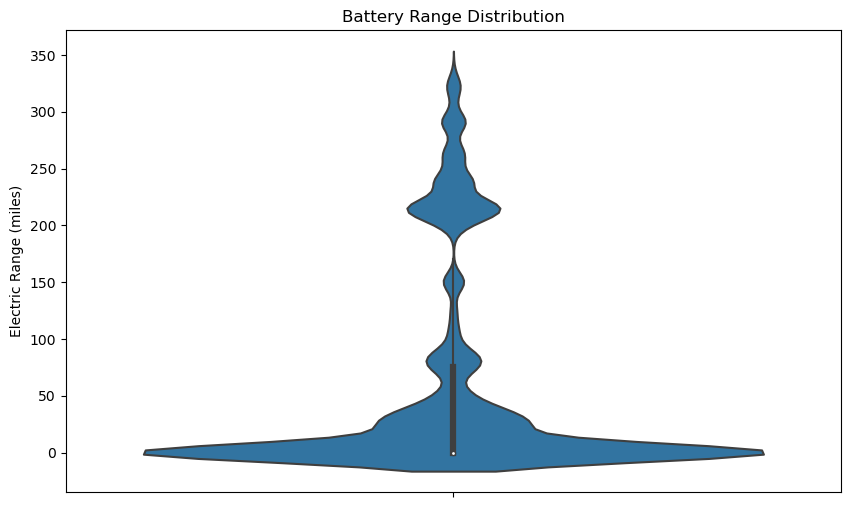

In [8]:
# Visualizing Battery Range using Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='Electric Range')
plt.title('Battery Range Distribution')
plt.ylabel('Electric Range (miles)')
plt.show()

In [9]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

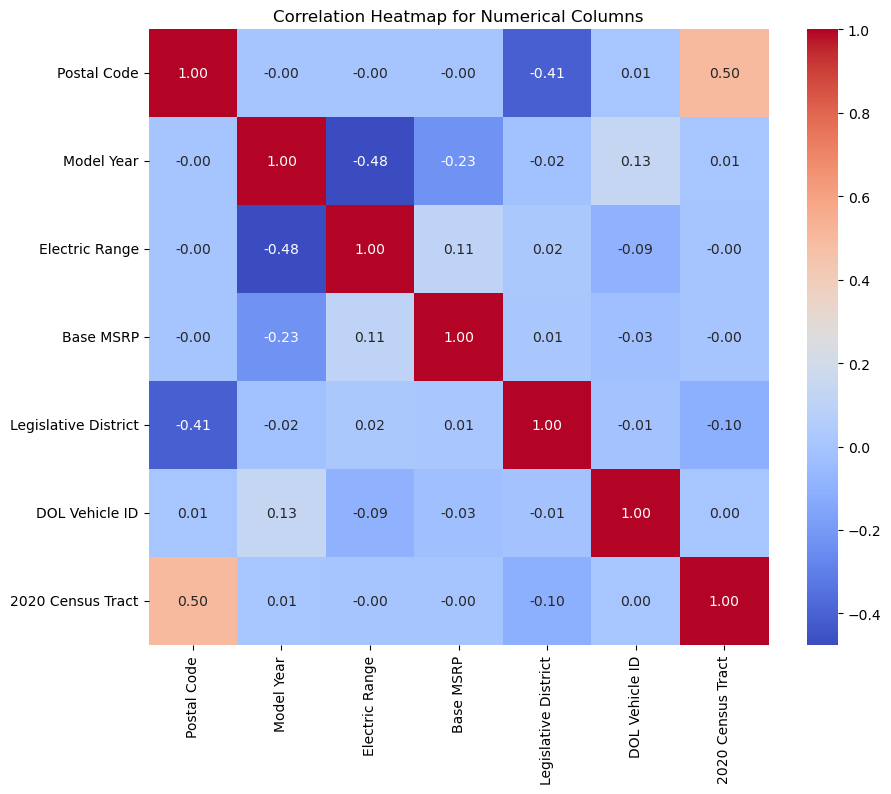

In [10]:
# Heatmap for Correlation with all numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [11]:
column_names = data.columns
print("Column names of EV DataFrame:", column_names)

Column names of EV DataFrame: Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


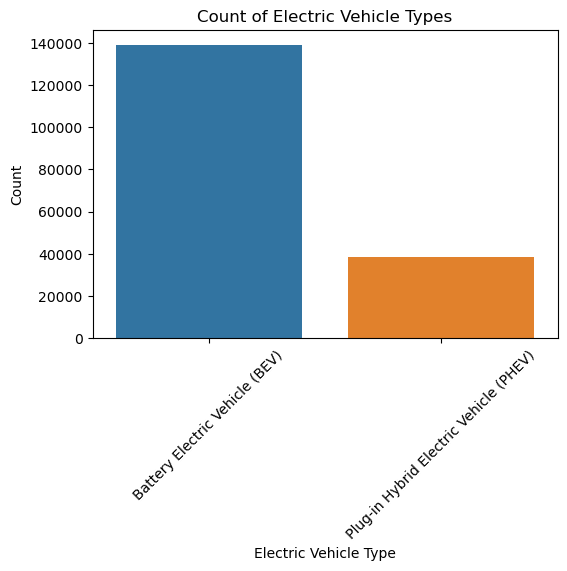

In [12]:
# Count of each Electric Vehicle Type
plt.figure(figsize=(6, 4))
sns.countplot(x='Electric Vehicle Type', data=data)
plt.title('Count of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

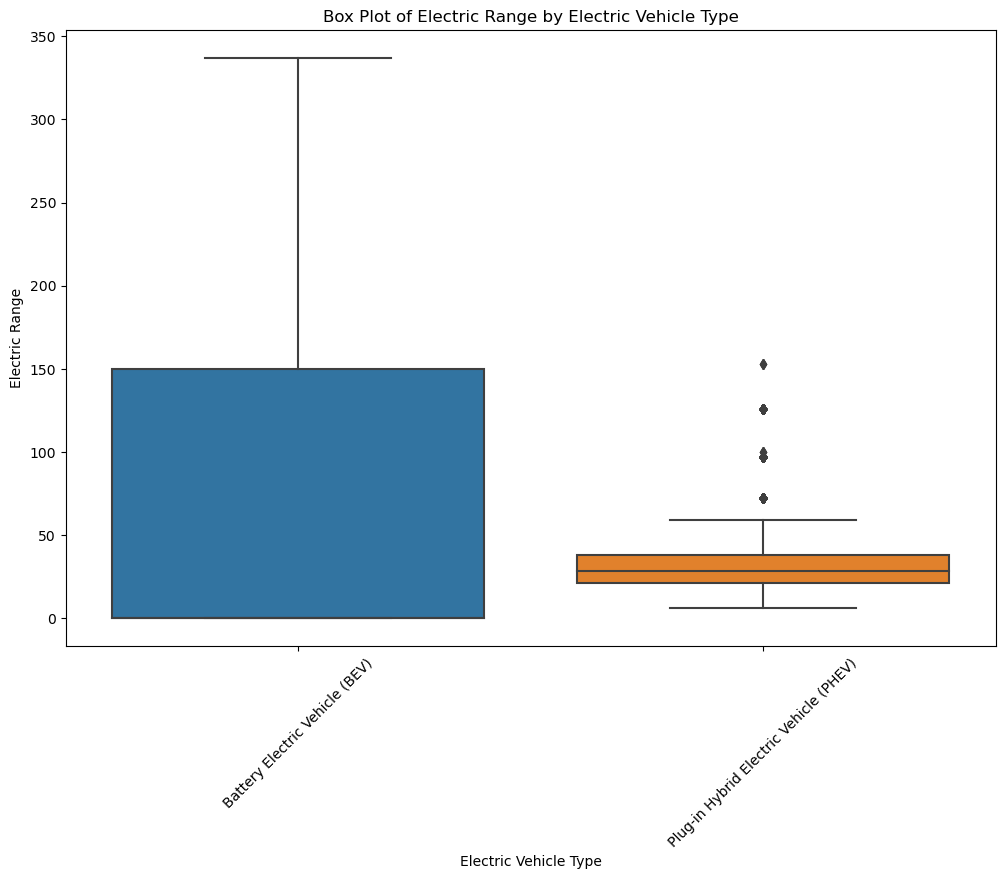

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=data)
plt.title('Box Plot of Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.xticks(rotation=45)
plt.show()

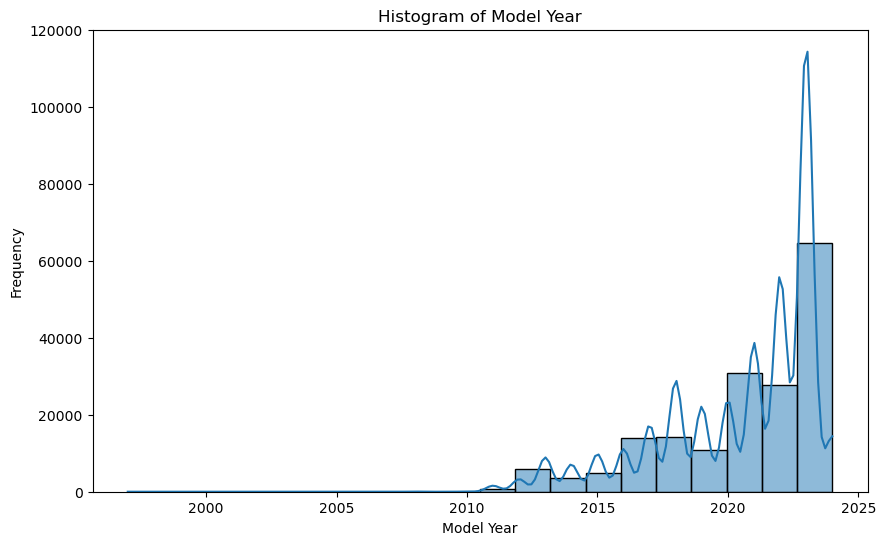

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Model Year'], bins=20, kde=True)
plt.title('Histogram of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

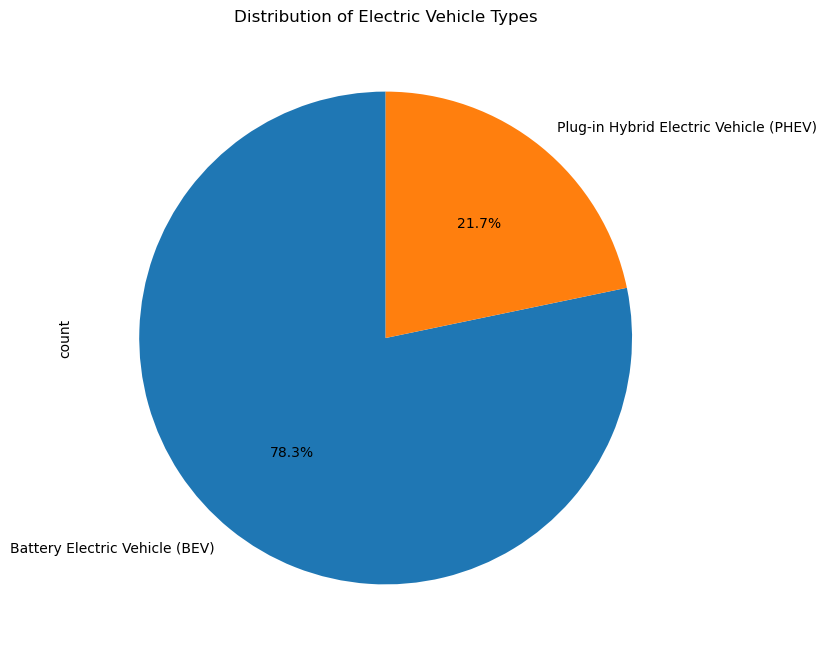

In [15]:
plt.figure(figsize=(8, 8))
data['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

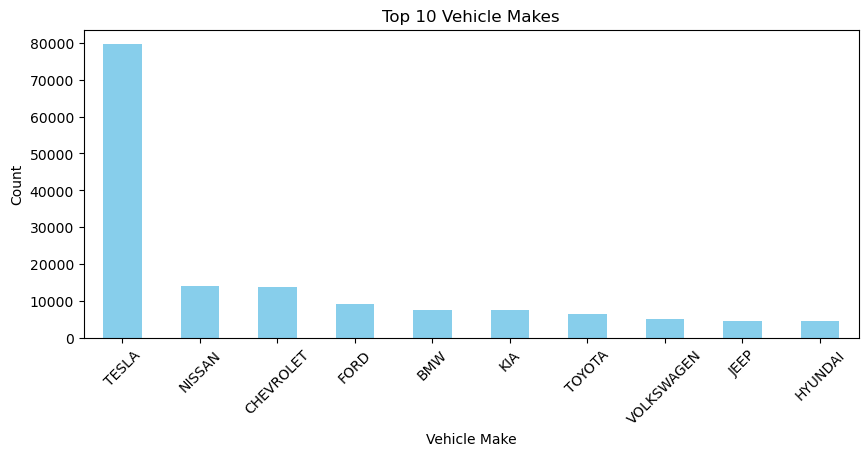

In [16]:
plt.figure(figsize=(10, 4))
top_makes = data['Make'].value_counts().nlargest(10)
top_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Makes')
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Cleaning Null Values
data.dropna(inplace=True)

# Checking Duplicate Value
data.duplicated().sum()

# Removing Column
data['State'].value_counts()

# State column has only one value i.e WA means Washington D.C. So we can remove 'state' column
data.drop(columns='State',inplace=True)

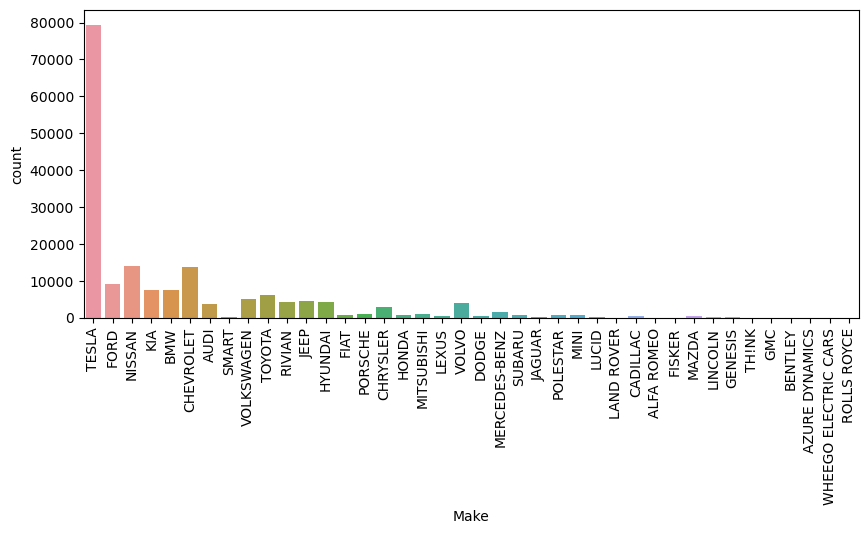

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x='Make',data=data)
plt.xticks(rotation=90);

<Axes: ylabel='count'>

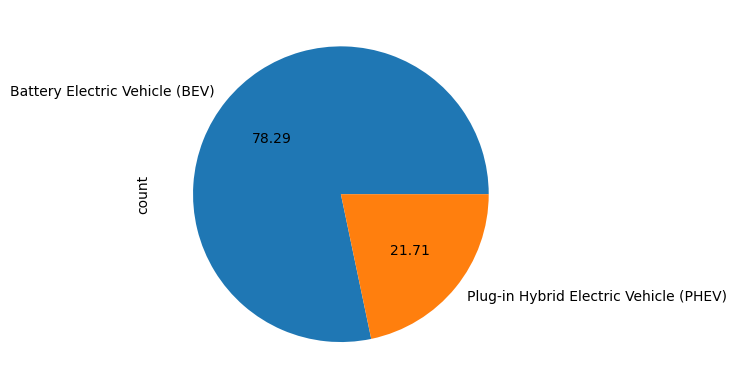

In [19]:
data['Electric Vehicle Type'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

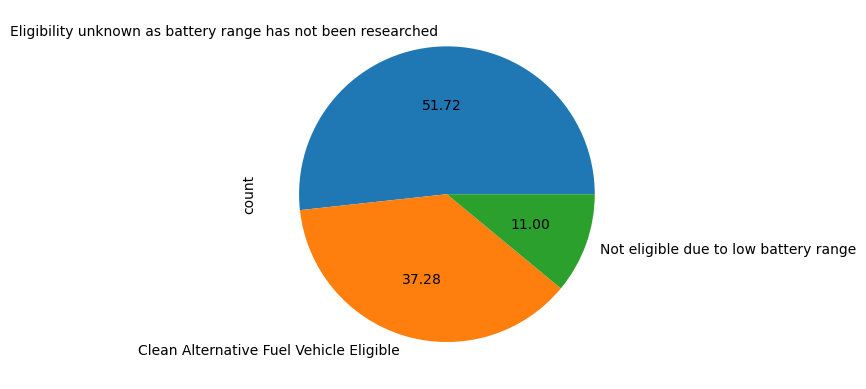

In [20]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Electric Vehicle Type', ylabel='Electric Range'>

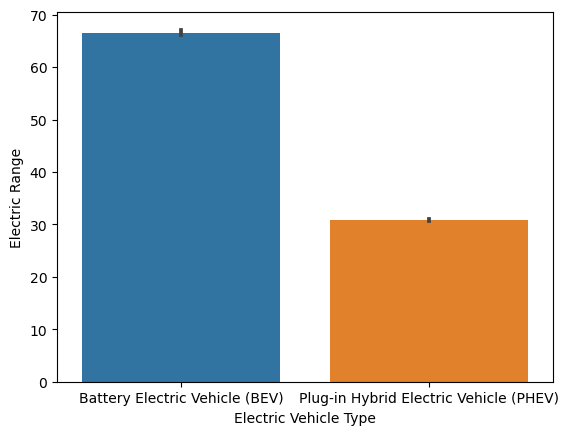

In [21]:
sns.barplot(x='Electric Vehicle Type',y='Electric Range',data=data)

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

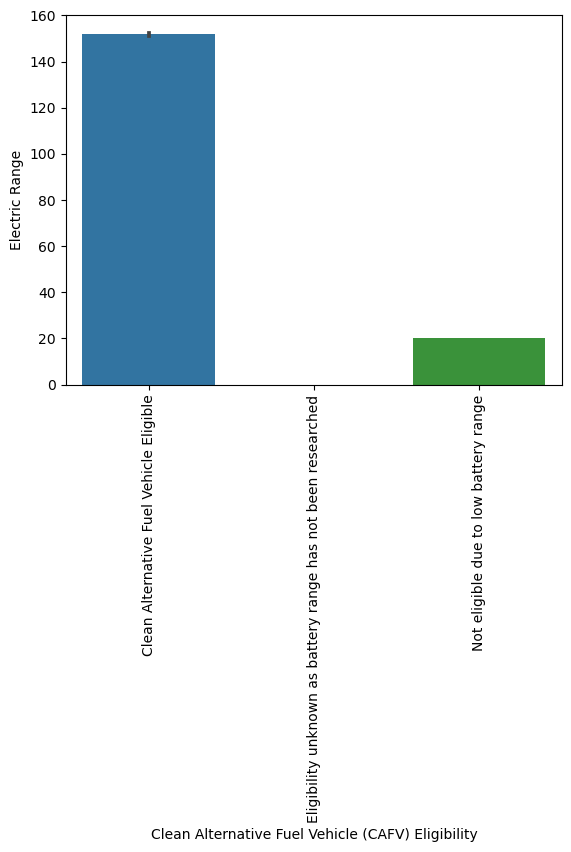

In [22]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Electric Range',data=data)
plt.xticks(rotation=90)

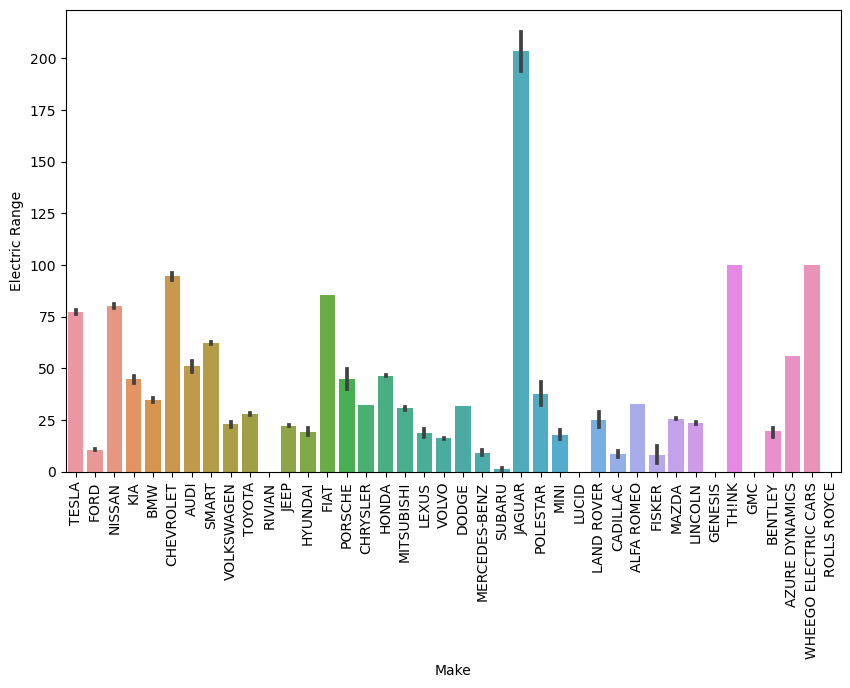

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Make',y='Electric Range',data=data)
plt.xticks(rotation=90);

<Axes: xlabel='Model Year', ylabel='Electric Range'>

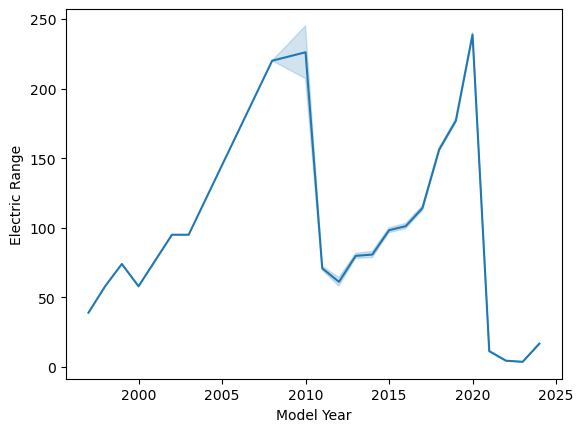

In [24]:
sns.lineplot(x='Model Year',y='Electric Range',data=data)

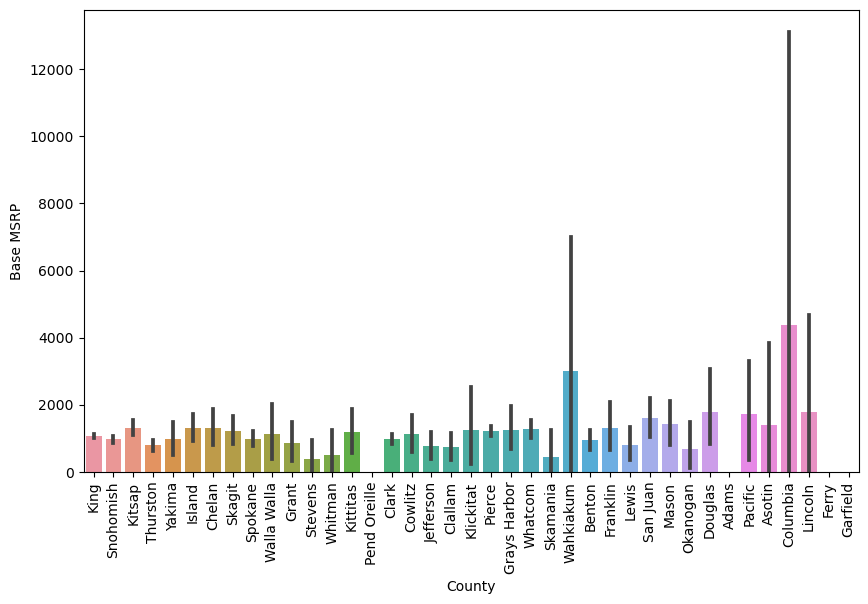

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='County',y='Base MSRP',data=data)
plt.xticks(rotation=90);

<Axes: xlabel='Electric Vehicle Type', ylabel='Base MSRP'>

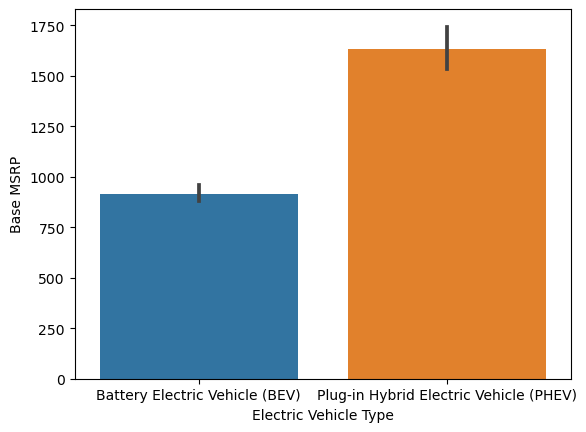

In [26]:
sns.barplot(x='Electric Vehicle Type',y='Base MSRP',data=data)

(array([0, 1, 2]),
 [Text(0, 0, 'Clean Alternative Fuel Vehicle Eligible'),
  Text(1, 0, 'Eligibility unknown as battery range has not been researched'),
  Text(2, 0, 'Not eligible due to low battery range')])

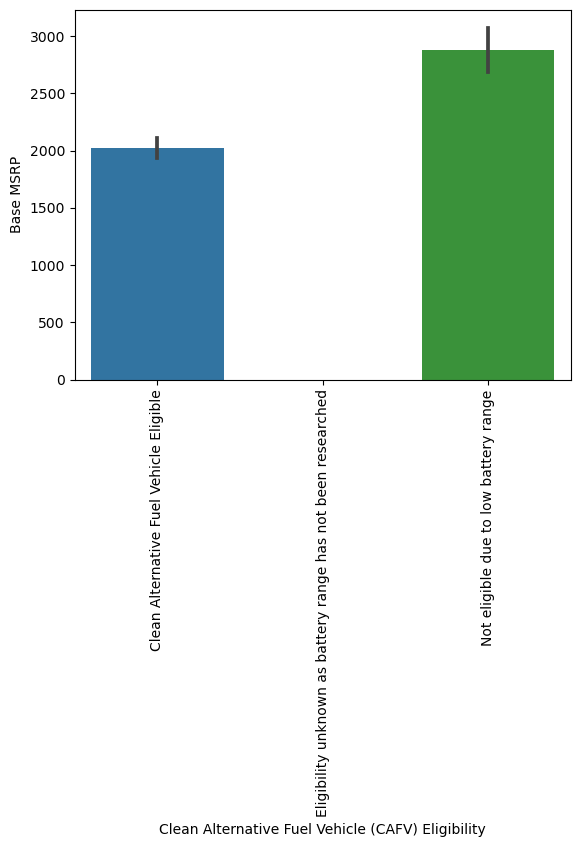

In [27]:
sns.barplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Base MSRP',data=data)
plt.xticks(rotation=90)

In [28]:
# Defining the response variable
response_variable = 'Electric Range'
print(f'The response variable is: {response_variable}')

The response variable is: Electric Range


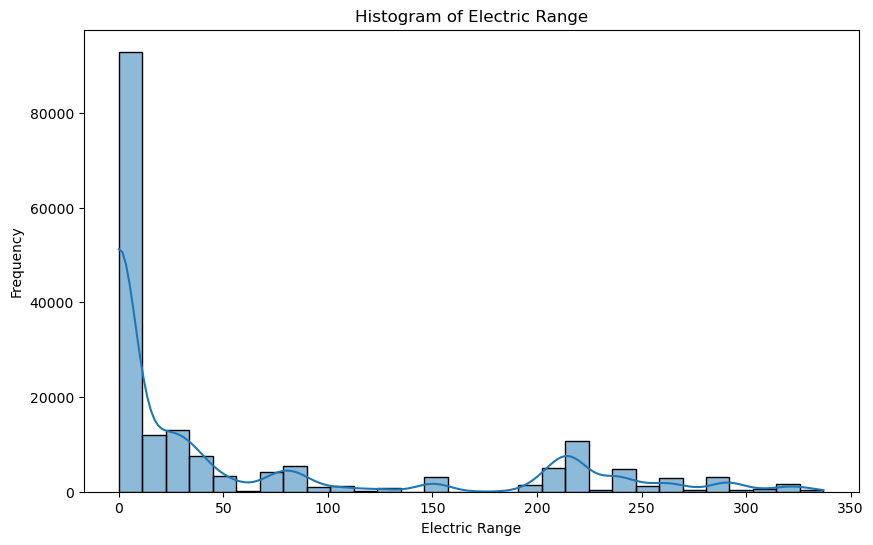

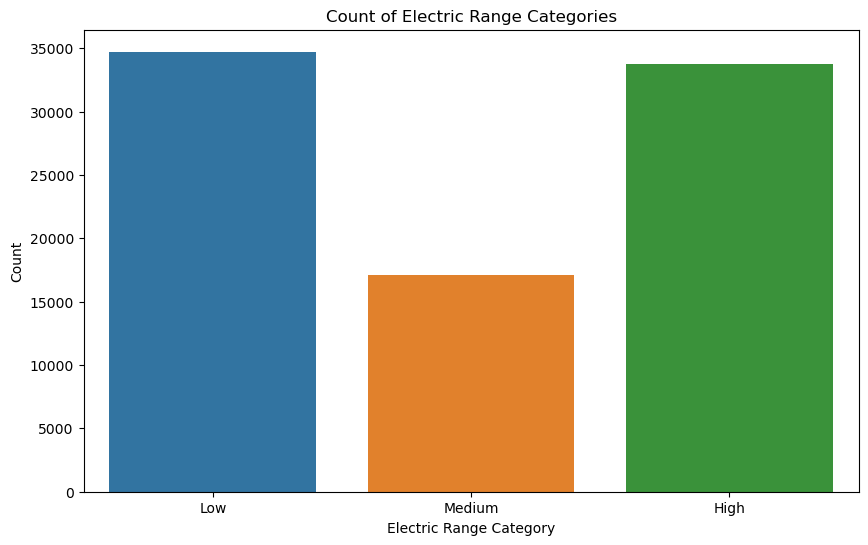

In [29]:
# Plotting histogram to determine the thresholds for Electric Range categories
plt.figure(figsize=(10, 6))
sns.histplot(data['Electric Range'], bins=30, kde=True)
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

# Research-based thresholds for Electric Range categories
low_threshold = 50
medium_threshold = 150

# Categorizing Electric Range into Low, Medium, High
bins = [0, low_threshold, medium_threshold, np.inf]
labels = ['Low', 'Medium', 'High']
data['Electric_Range_Category'] = pd.cut(data['Electric Range'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.countplot(x='Electric_Range_Category', data=data)
plt.title('Count of Electric Range Categories')
plt.xlabel('Electric Range Category')
plt.ylabel('Count')
plt.show()

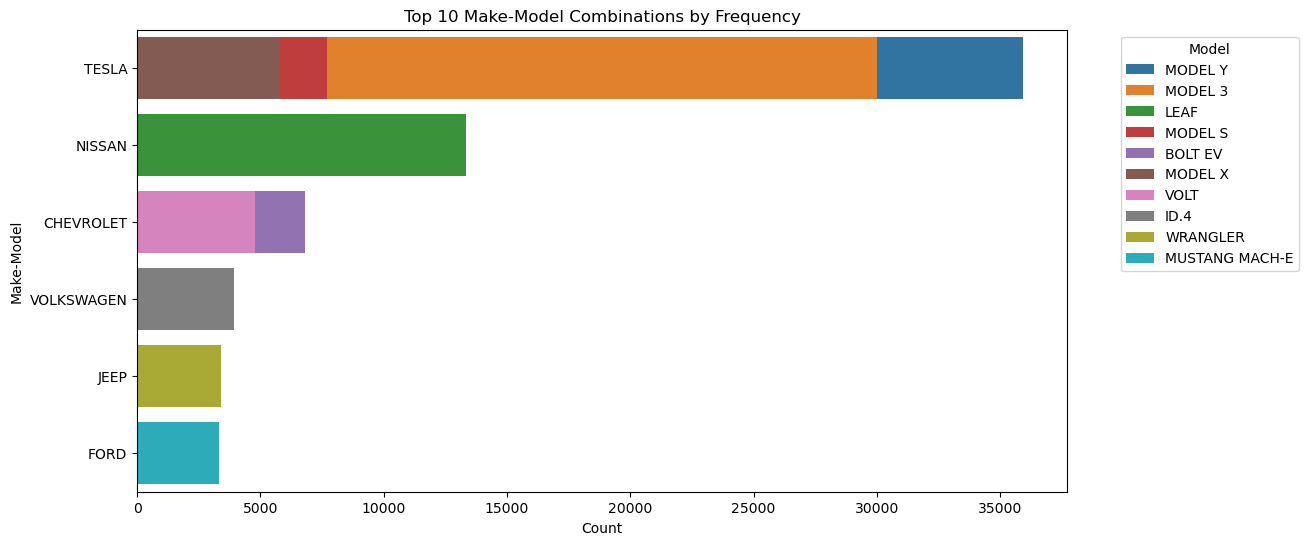

In [30]:
# Analyzing Make and Model per frequency
top_makes_models = data.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Make', hue='Model', data=top_makes_models, dodge=False)
plt.title('Top 10 Make-Model Combinations by Frequency')
plt.xlabel('Count')
plt.ylabel('Make-Model')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()